In [0]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers
%matplotlib inline

Using TensorFlow backend.


In [0]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [0]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [0]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [0]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("C:/Mahe/Desktop/melanoma"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [0]:
melanoma_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,256))
    melanoma_images.append(image)

In [0]:
root = "C:/Mahe/Desktop/gt"

In [0]:
ground_truth_images_melanoma = []
for filename in filenames :
    filename = filename[0:-4] + "_segmentation.png"
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,256))
    ground_truth_images_melanoma.append(image)

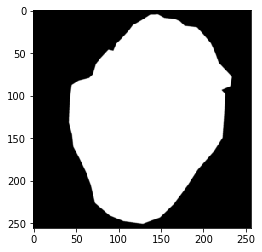

In [0]:
plt.imshow(ground_truth_images_melanoma[6], cmap = "gray")

In [0]:
np.unique(ground_truth_images_melanoma[6])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [0]:
ground_truth_images_melanoma[6].shape

(256, 256)

In [0]:
import cv2

In [0]:
ret,thresh_img = cv2.threshold(ground_truth_images_melanoma[6],127,255,cv2.THRESH_BINARY)

In [0]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("C:/Mahe/Desktop/gt/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [0]:
ground_truth_images_melanoma = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,256))
    ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    ground_truth_images_melanoma.append(image)

In [0]:
from scipy.misc import imsave

In [0]:
len(ground_truth_images_melanoma)

2000

In [0]:
for i in range(len(ground_truth_images_melanoma)) :
    imsave('C:/Mahe/Desktop/gt_resized/'+filenames[i],ground_truth_images_melanoma[i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [0]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("C:/Mahe/Desktop/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [0]:
for i in range(len(melanoma_images)):
    imsave("C:/Mahe/Desktop/melanoma_resized/" + filenames[i], melanoma_images[i])

In [0]:
image = ndimage.imread("C:/Mahe/Desktop/gt_resized/ISIC_0000000_segmentation.png", mode = 'L')

In [0]:
image.shape

(256, 256)

In [0]:
np.unique(image)

array([  0, 255], dtype=uint8)

In [0]:
gt = np.array(ground_truth_images_melanoma)

In [0]:
gt.shape

(2000, 256, 256)

In [0]:
np.unique(gt)

array([  0, 255], dtype=uint8)

In [0]:
gt = gt/255

In [0]:
np.unique(gt)

array([0, 1], dtype=uint8)

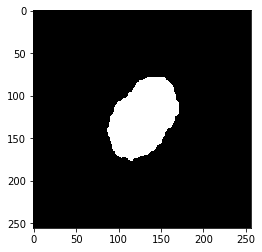

In [0]:
plt.imshow(gt[6],cmap = "gray")

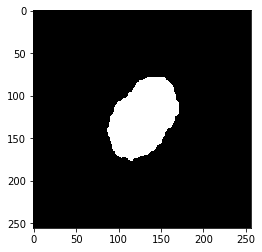

In [0]:
plt.imshow(ground_truth_images_melanoma[6], cmap = "gray")

In [0]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("C:/Mahe/Desktop/others/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [0]:
other_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,256))
    other_images.append(image)

In [0]:
for i in range(len(other_images)):
    imsave("C:/Mahe/Desktop/Others_resized/" + filenames[i], other_images[i])

In [0]:
np.unique(gt[0])

array([0, 1], dtype=uint8)

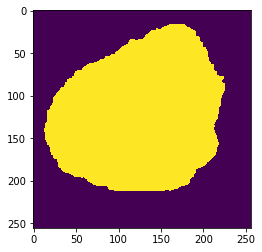

In [0]:
plt.imshow(gt[0])

In [0]:
np.save("ground_truth_resized.npy", gt)

In [0]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("C:/Mahe/Desktop/Total_train_segmentation/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [0]:
total_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    total_images.append(image)

In [0]:
total_images = np.array(total_images)

In [0]:
total_images.shape

(2000, 256, 256, 3)

In [0]:
np.save("total_images.npy",total_images)

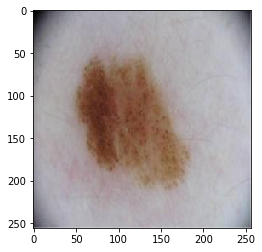

In [0]:
plt.imshow(total_images[10])

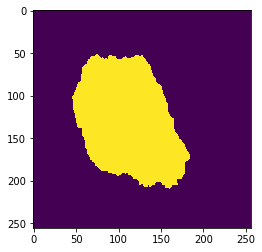

In [0]:
plt.imshow(gt[10])